In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Assume now we have a sound $y=cos(2\pi x)$. Let's see what we can do with it by using the knowledge learned in the lecture. Along this time, you are going to learn how to visualize a function by using matplotlib.

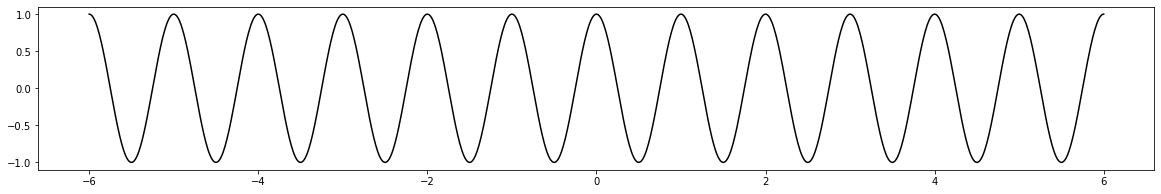

In [3]:
plt.figure(figsize=(20, 3))
x = np.linspace(-6, 6, 1000)
plt.plot(x, np.cos(2 * np.pi * x), color='black')

## Sampling

Now let's see what we can get under different sampling scale.
For function $y=cos(2\pi x)$, we know the frequency is $f=1$, so according to Nyquist Theorem, we need to sample at least in frequncy $f_s = 2 * f = 2$. 

Now our signal is in range $[-6, 6]$, 12 seconds in total. So we at least need to sample $12 * f_s = 24$ points. What's more, since we are ploting a closed range (with end points), we need to add one more points to the end.

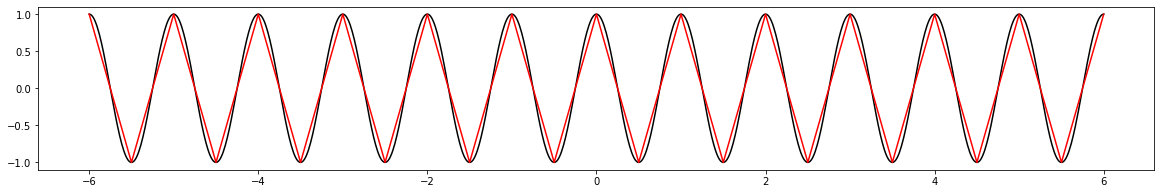

In [29]:
plt.figure(figsize=(20, 3))
x = np.linspace(-6, 6, 1000)
plt.plot(x, np.cos(2 * np.pi * x), color='black')

x_nyquist = np.linspace(-6, 6, 25)
plt.plot(x_nyquist, np.cos(2 * np.pi * x_nyquist), color='red')

Once the sampling number is not enough, even just one point less, the signal will include alias. 

If we only sample 24 points, excluding the endpoint, we sample 23 points in 12 seconds, whose frequency is only $f_s = 23 \div 12 = 1.9$

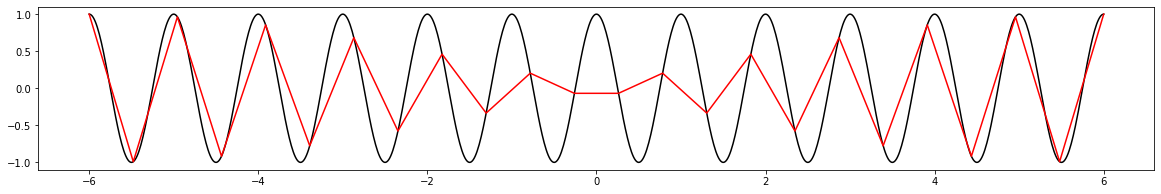

In [28]:
plt.figure(figsize=(20, 3))
x = np.linspace(-6, 6, 1000)
plt.plot(x, np.cos(2 * np.pi * x), color='black')

x_24 = np.linspace(-6, 6, 24)
plt.plot(x_24, np.cos(2 * np.pi * x_24), color='red')

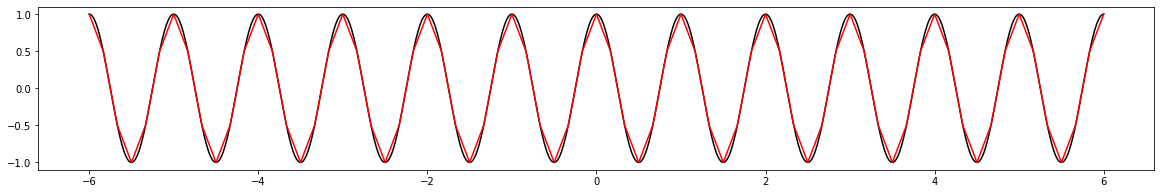

In [30]:
plt.figure(figsize=(20, 3))
x = np.linspace(-6, 6, 1000)
plt.plot(x, np.cos(2 * np.pi * x), color='black')

sampling_frequency = 6
x_play = np.linspace(-6, 6, round(sampling_frequency * 12) + 1)
plt.plot(x_play, np.cos(2 * np.pi * x_play), color='red')

## Quantization

Like image color, signal value is represented by N-bit number. 

In [40]:
# convert the audio signal into 8-bit values
x = np.linspace(0, 1, 100)
y = np.cos(2 * np.pi * x)

# normalize the signal
y_normalized = (y + 1) / 2.
y_int = np.floor(y_normalized * (2 ** 8 - 1))
y_8bit = y_int / (2 ** 8 - 1) * 2 - 1

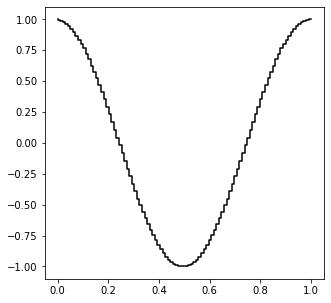

In [41]:
plt.figure(figsize=(5,5))
plt.step(x, y_8bit, color='black')

In [42]:
def quantize_to_N_bit(y_normalized, N):
    y_int = np.floor(y_normalized * (2 ** N - 1))
    y_Nbit = y_int / (2 ** N - 1)
    return y_Nbit

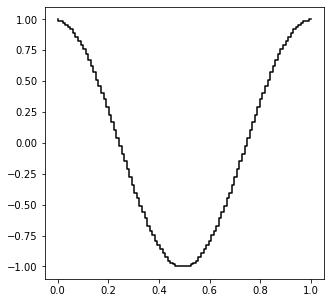

In [56]:
plt.figure(figsize=(5,5))
plt.step(x, quantize_to_N_bit(y_normalized, 7) * 2 - 1, color='black')